# Week 14
Bi-directinal LSTM for sentiment analysis on movie reviews

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.datasets import imdb
from matplotlib import pyplot as plt

In [ ]:
n_unique_words = 10000
maxlen = 200
batch_size = 120
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=n_unique_words)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

c:\Users\bansa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
history = model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=10, validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print(history.history['loss'])
print(history.history['accuracy'])

Epoch 1/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 85s 389ms/step - accuracy: 0.6701 - loss: 0.5782 - val_accuracy: 0.8426 - val_loss: 0.3714
Epoch 2/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 85s 408ms/step - accuracy: 0.8862 - loss: 0.2930 - val_accuracy: 0.8676 - val_loss: 0.3086
Epoch 3/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 87s 418ms/step - accuracy: 0.9280 - loss: 0.1982 - val_accuracy: 0.8692 - val_loss: 0.3273
Epoch 4/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 89s 428ms/step - accuracy: 0.9473 - loss: 0.1470 - val_accuracy: 0.8564 - val_loss: 0.3934
Epoch 5/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 94s 452ms/step - accuracy: 0.9483 - loss: 0.1457 - val_accuracy: 0.8558 - val_loss: 0.4946
Epoch 6/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 91s 435ms/step - accuracy: 0.9696 - loss: 0.0922 - val_accuracy: 0.8539 - val_loss: 0.4104
Epoch 7/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 90s 433ms/step - accuracy: 0.9738 - loss: 0.0791 - val_accuracy: 0.8406 - val_loss: 0.5191
Epoch 8/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 91s 438ms/step - accuracy: 0.9764 - loss: 0

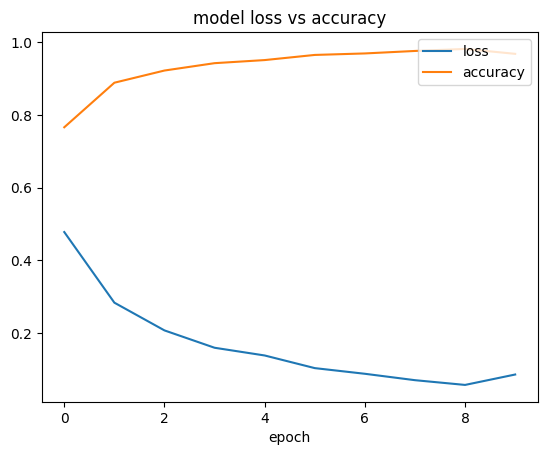

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()